In [ ]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [16]:
df = pd.read_csv('../../data/handlebar/Accelerometer_data_combined_segmented.csv') 
# df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,2024-07-24 10:26:02.003,2024-07-24 10:26:02.499,8.805878,8.796295,8.757996,8.781937,8.805878,8.796295,8.781937,...,8.757996,8.757996,8.762772,8.757996,8.762772,8.767563,8.738831,8.757996,8.743622,8.772354
1,0.0,2024-07-24 10:26:02.503,2024-07-24 10:26:02.995,8.767563,8.748413,8.753204,8.767563,8.777145,8.781937,8.748413,...,8.777145,8.767563,8.796295,8.810669,8.781937,8.781937,8.757996,8.801086,8.762772,8.757996
2,0.0,2024-07-24 10:26:03.002,2024-07-24 10:26:03.497,8.767563,8.767563,8.772354,8.757996,8.786728,8.777145,8.781937,...,8.777145,8.753204,8.777145,8.767563,8.762772,8.786728,8.734055,8.786728,8.753204,8.786728
3,0.0,2024-07-24 10:26:03.502,2024-07-24 10:26:03.999,8.748413,8.777145,8.767563,8.757996,8.757996,8.757996,8.767563,...,8.762772,8.767563,8.772354,8.801086,8.796295,8.791504,8.781937,8.796295,8.781937,8.781937
4,0.0,2024-07-24 10:26:04.004,2024-07-24 10:26:04.497,8.753204,8.767563,8.748413,8.767563,8.767563,8.772354,8.772354,...,8.786728,8.762772,8.762772,8.767563,8.743622,8.729263,8.743622,8.777145,8.781937,8.791504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,1.0,2024-07-24 11:07:59.132,2024-07-24 11:07:59.497,-9.054871,-9.054871,-17.180786,-21.806396,-20.963638,-3.620026,-12.349289,...,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798
4423,1.0,2024-07-24 11:08:33.627,2024-07-24 11:08:33.995,-22.697037,-22.697037,-24.578873,-24.578873,-23.151932,-11.784256,6.440399,...,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062
4424,1.0,2024-07-24 11:08:51.500,2024-07-24 11:08:51.932,19.646820,18.617310,15.653290,14.911087,28.629868,33.657684,32.556350,...,15.849609,8.700531,10.860092,10.860092,11.185715,11.616669,11.616669,11.616669,11.616669,11.616669
4425,1.0,2024-07-24 11:09:36.075,2024-07-24 11:09:36.497,13.508087,13.508087,13.177689,17.094604,18.507187,18.507187,20.657180,...,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523


In [17]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)


In [18]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])


In [19]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
train_data_scaled_df['start_time'] = train_data['start_time'].values
train_data_scaled_df['end_time'] = train_data['end_time'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
test_data_scaled_df['start_time'] = test_data['start_time'].values
test_data_scaled_df['end_time'] = test_data['end_time'].values

In [20]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-3]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-3]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-3]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-3]
# Example usage: Accessing the original index
print(normal_test_data_scaled.index)
print(abnormal_test_data_scaled.index)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       876, 877, 878, 879, 880, 881, 882, 883, 884, 885],
      dtype='int64', length=875)
Index([43, 62, 110, 229, 563, 577, 663, 668, 677, 787, 793], dtype='int64')


In [21]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [22]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(32, activation='tanh'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(0.2), 
            tf.keras.layers.Dense(100, activation='tanh')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [23]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')
model.compile(optimizer='adam', loss='mae')

In [24]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, 
                    normal_train_data_scaled,
                    epochs=150, 
                    batch_size=128,
                    validation_split=0.3, 
                    shuffle=True, 
                    callbacks=[early_stopping])

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5644 - val_loss: 0.5268
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4914 - val_loss: 0.4953
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4719 - val_loss: 0.4757
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4603 - val_loss: 0.4626
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4414 - val_loss: 0.4515
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4367 - val_loss: 0.4424
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4284 - val_loss: 0.4357
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4191 - val_loss: 0.4293
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4184 - val_loss: 0.4244
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4136 - val_loss: 0.4209
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3972 - val_loss: 0.4176
Epoch 12/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

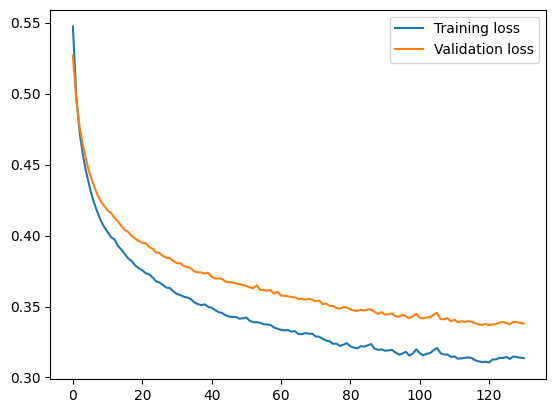

In [25]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

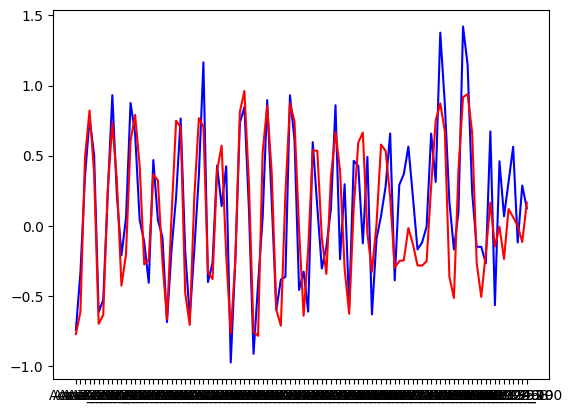

In [26]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled.iloc[0], 'blue')
plt.plot(decoder_out[0], 'red')

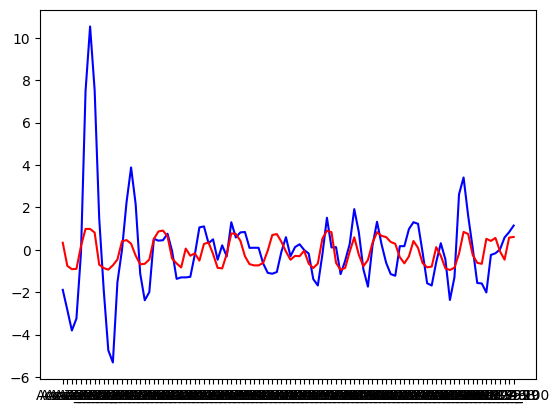

In [27]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled.iloc[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(array([229.,  19.,  14.,  14.,   6.,   4.,   4.,   7.,  25.,  36.,  54.,
         52.,  43.,  40.,  45.,  33.,  36.,  35.,  28.,  25.,  12.,  16.,
         12.,  13.,  11.,  11.,   8.,   6.,   4.,   5.,   7.,   2.,   3.,
          3.,   3.,   0.,   0.,   2.,   2.,   1.,   2.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.00323981, 0.03148695, 0.05973411, 0.08798125, 0.1162284 ,
        0.14447556, 0.17272271, 0.20096986, 0.22921701, 0.25746417,
        0.28571132, 0.31395847, 0.34220561, 0.37045276, 0.39869991,
        0.42694706, 0.45519421, 0.48344135, 0.51168853, 0.53993565,
        0.56818283, 0.59642994, 0.62467712, 0.65292424, 0.68117142,
        0.70941854, 0.73766571, 0.76591283, 0.79416001, 0.82240713,
        0.8506543 , 0.87890142, 0.9071486 , 0.93539578, 0.9636429 ,
        0.99189007, 1.02013719, 1.04838431, 1.07663143, 1.10487854,
        1.13312578, 1.1613729 , 1.18962002, 1.21786714, 1.24611437,
        1.27436149, 1.30260861, 1.33085573, 1.

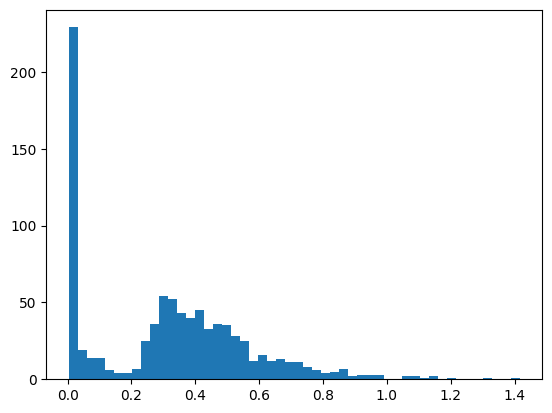

In [28]:
reconstruction_normal = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction_normal, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.17977488, 1.21489239, 1.25000989, 1.2851274 , 1.32024491,
        1.35536242, 1.39047992, 1.42559743, 1.46071494, 1.49583244,
        1.53094995, 1.56606746, 1.60118508, 1.63630247, 1.6714201 ,
        1.70653749, 1.74165511, 1.7767725 , 1.81189013, 1.84700751,
        1.88212514, 1.91724253, 1.95236015, 1.98747754, 2.02259517,
        2.05771255, 2.09283018, 2.12794781, 2.1630652 , 2.19818258,
        2.23330021, 2.26841784, 2.30353522, 2.33865261, 2.37377024,
        2.40888786, 2.44400525, 2.47912264, 2.51424026, 2.54935789,
        2.58447528, 2.61959267, 2.65471029, 2.68982792, 2.72494531,
        2.76006269, 2.79518032, 2.83029795, 2.86541557, 2.90053296,
        2.93565035]),
 <BarContainer object of 50 artists>)

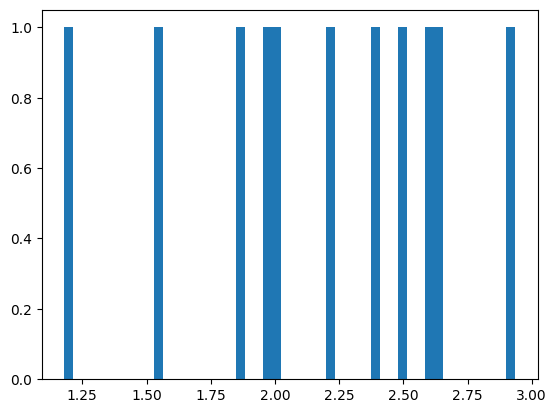

In [29]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

In [30]:
# threshold auswählen nach business logic
threshold = np.mean(train_loss) + 2.5*np.std(train_loss)
threshold

np.float32(0.9645297)

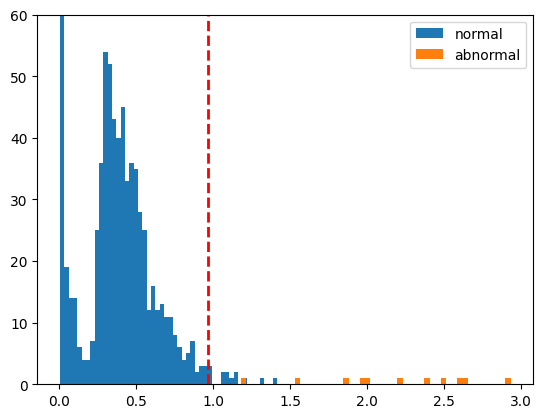

In [31]:

plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threshold))
plt.show()

In [32]:
preds_normal=tf.math.less(train_loss, threshold)
correct = tf.math.count_nonzero(preds_normal)
false_predictions_normal = [i for i, x in enumerate(preds_normal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_normal))
print("False Predictions index: ", false_predictions_normal)

Correct Predictions:  862
Accuracy:  0.9851428571428571
False Predictions index:  [7, 28, 30, 151, 162, 277, 372, 535, 561, 770, 788, 796, 845]


In [33]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threshold)
correct = tf.math.count_nonzero(preds_abnormal)
false_predictions_abnormal = [i for i, x in enumerate(preds_abnormal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  11
Accuracy:  1.0


In [34]:
# 1. Combine the three DataFrames into one
combined_df = pd.concat([
    train_data_scaled_df,
    test_data_scaled_df,
], ignore_index=True)

# 2. Convert 'start_time' to datetime if it's not already
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])

# 3. Sort by the 'start_time' column
combined_df.sort_values('start_time', inplace=True)

# 4. Set 'start_time' as the index
combined_df.set_index('start_time', inplace=True)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


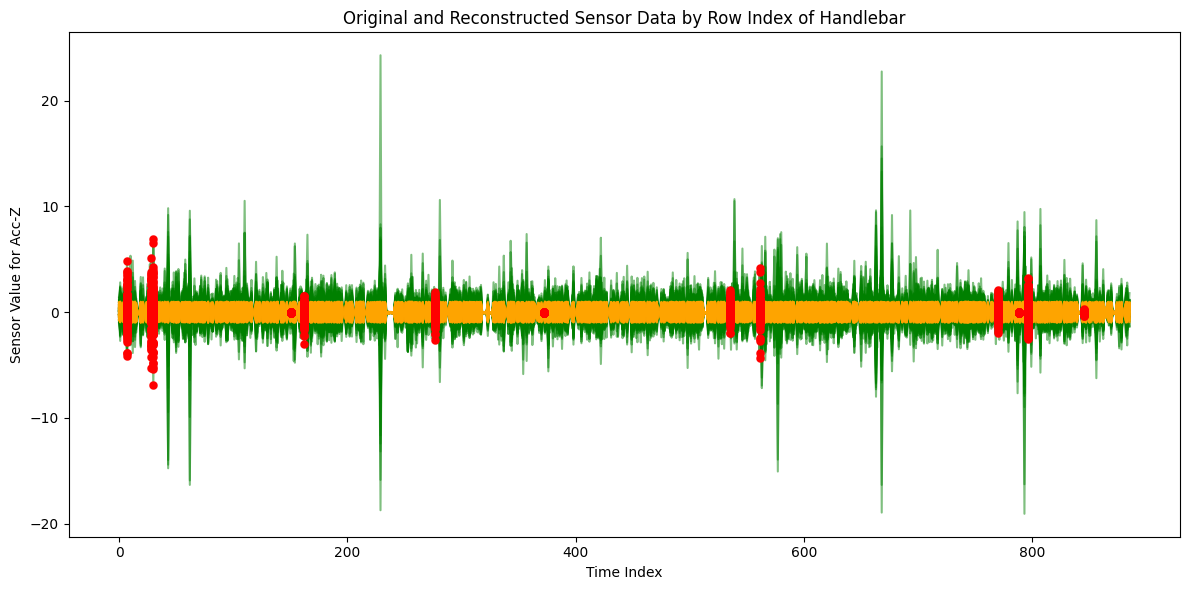

In [35]:
# reconstruct test data using autoencoder

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your autoencoder model and combined_df ready

# 1. Select columns to plot (e.g., "Acc-Z_1" to "Acc-Z_100")
sensor_cols = [col for col in test_data_scaled_df.columns if col.startswith("Acc-Z_")]

# 2. Extract the sensor data from combined_df
sensor_data = test_data_scaled_df[sensor_cols].values

# 3. Reconstruct the data using the autoencoder
reconstructed_data = model.predict(sensor_data)

# 4. Plot the original and reconstructed data points
plt.figure(figsize=(12, 6))

# Plot original data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, sensor_data[:, i], color='green', alpha=0.5)

# Plot reconstructed data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, reconstructed_data[:, i], color='orange', alpha=0.5)

# Highlight false predictions with a vertical scatter
for row_i in false_predictions_normal:
    y_values = sensor_data[row_i, :] 
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3, linewidths=0.1)
for row_i in false_predictions_abnormal:
    y_values = sensor_data[row_i, :] 
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3)

plt.title("Original and Reconstructed Sensor Data by Row Index of Handlebar")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value for Acc-Z")
plt.tight_layout()
plt.show()